## Modeling Exercises

Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

1. Clustering with the Iris Dataset

   Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.

    b. Visualize the results of your clustering.

    c. Use the elbow method to visually select a good value for k.

    d. Repeat the clustering, this time with 3 different features.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# custom visuals for this lesson
import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

In [2]:
from pydataset import data

# import data

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


a. Choose features other than the ones used in the lesson.

In [4]:
# define independent variables for k-means

X = iris[['sepal_width', 'petal_width']]
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


In [5]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [6]:
X_scaled.head()

,sepal_width,petal_width
1,1.019004,-1.315444
2,-0.131979,-1.315444
3,0.328414,-1.315444
4,0.098217,-1.315444
5,1.249201,-1.315444


In [7]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [8]:
# make a new column names cluster in iris and X_scaled dataframe
iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [9]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
33,5.2,4.1,1.5,0.1,setosa,0
86,6.0,3.4,4.5,1.6,versicolor,2
89,5.6,3.0,4.1,1.3,versicolor,1
145,6.7,3.3,5.7,2.5,virginica,2
88,6.3,2.3,4.4,1.3,versicolor,1
71,5.9,3.2,4.8,1.8,versicolor,2
140,6.9,3.1,5.4,2.1,virginica,2
18,5.1,3.5,1.4,0.3,setosa,0
56,5.7,2.8,4.5,1.3,versicolor,1
92,6.1,3.0,4.6,1.4,versicolor,2


b. Visualize the results of your clustering.

In [10]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_width,petal_width
0,0.906255,-1.256344
1,-1.006727,0.229918
2,0.116272,0.981666


In [11]:
X_scaled['cluster'] = 'cluster_' + iris.cluster.astype(str)
X_scaled.head()

,sepal_width,petal_width,cluster
1,1.019004,-1.315444,cluster_0
2,-0.131979,-1.315444,cluster_0
3,0.328414,-1.315444,cluster_0
4,0.098217,-1.315444,cluster_0
5,1.249201,-1.315444,cluster_0


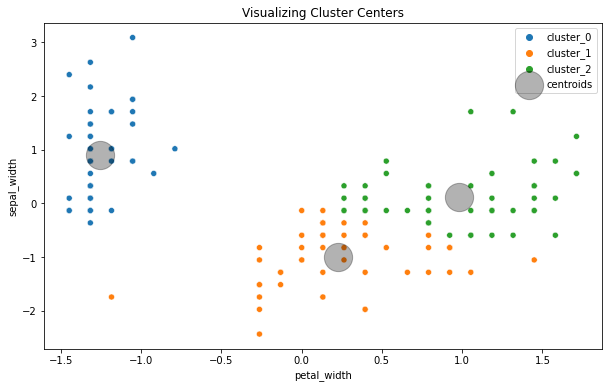

In [12]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='petal_width', y='sepal_width', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_width', y='sepal_width', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [13]:
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_0
2,4.9,3.0,1.4,0.2,setosa,cluster_0
3,4.7,3.2,1.3,0.2,setosa,cluster_0
4,4.6,3.1,1.5,0.2,setosa,cluster_0
5,5.0,3.6,1.4,0.2,setosa,cluster_0


In [14]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_width', 'petal_width'].mean()
centroids

,sepal_width,petal_width
cluster,,
cluster_0,3.451020,0.244898
cluster_1,2.620000,1.374000
cluster_2,3.107843,1.945098


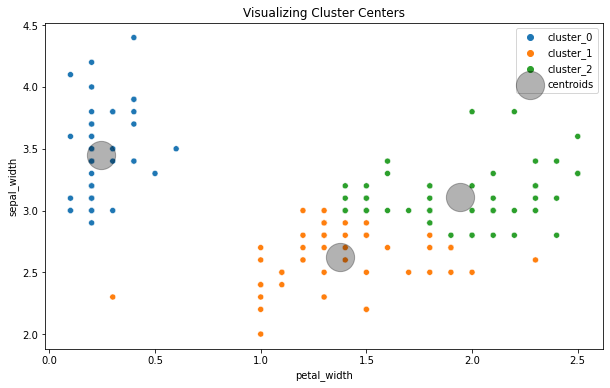

In [15]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='petal_width', y='sepal_width', data=iris, hue='cluster')
# plot cluster centers (centroids)
centroids.plot.scatter(x='petal_width', y='sepal_width', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')
plt.title('Visualizing Cluster Centers')
plt.legend();

c. Use the elbow method to visually select a good value for k.

In [16]:
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

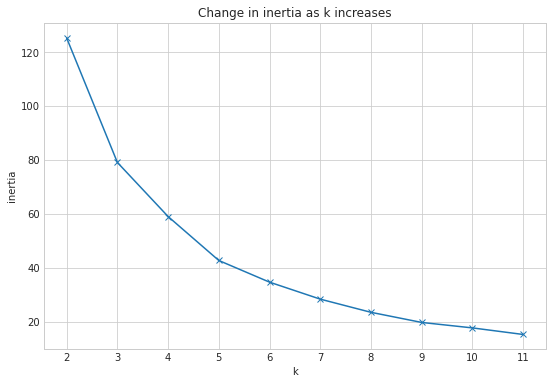

In [17]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

d. Repeat the clustering, this time with 3 different features.

In [18]:
X = iris[['sepal_width', 'petal_length', 'petal_width']]
X.head()

,sepal_width,petal_length,petal_width
1,3.5,1.4,0.2
2,3.0,1.4,0.2
3,3.2,1.3,0.2
4,3.1,1.5,0.2
5,3.6,1.4,0.2


In [19]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [20]:
X_scaled.head()

,sepal_width,petal_length,petal_width
1,1.019004,-1.340227,-1.315444
2,-0.131979,-1.340227,-1.315444
3,0.328414,-1.397064,-1.315444
4,0.098217,-1.283389,-1.315444
5,1.249201,-1.340227,-1.315444


In [21]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [22]:
# make a new column names cluster in iris and X_scaled dataframe
iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [23]:
iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
100,5.7,2.8,4.1,1.3,versicolor,1
85,5.4,3.0,4.5,1.5,versicolor,1
71,5.9,3.2,4.8,1.8,versicolor,2
79,6.0,2.9,4.5,1.5,versicolor,1
84,6.0,2.7,5.1,1.6,versicolor,1
48,4.6,3.2,1.4,0.2,setosa,0
116,6.4,3.2,5.3,2.3,virginica,2
32,5.4,3.4,1.5,0.4,setosa,0
127,6.2,2.8,4.8,1.8,virginica,1
27,5.0,3.4,1.6,0.4,setosa,0


In [24]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_width,petal_length,petal_width
0,0.906255,-1.303108,-1.256344
1,-0.906278,0.320460,0.218669
2,0.118234,1.004935,1.076828


In [25]:
X_scaled['cluster'] = 'cluster_' + iris.cluster.astype(str)
X_scaled.head()

,sepal_width,petal_length,petal_width,cluster
1,1.019004,-1.340227,-1.315444,cluster_0
2,-0.131979,-1.340227,-1.315444,cluster_0
3,0.328414,-1.397064,-1.315444,cluster_0
4,0.098217,-1.283389,-1.315444,cluster_0
5,1.249201,-1.340227,-1.315444,cluster_0


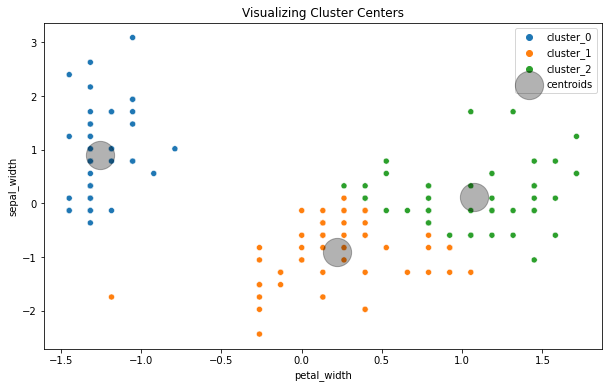

In [26]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='petal_width', y='sepal_width', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_width', y='sepal_width', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [27]:
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_0
2,4.9,3.0,1.4,0.2,setosa,cluster_0
3,4.7,3.2,1.3,0.2,setosa,cluster_0
4,4.6,3.1,1.5,0.2,setosa,cluster_0
5,5.0,3.6,1.4,0.2,setosa,cluster_0


In [28]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_width', 'petal_length', 'petal_width'].mean()
centroids

,sepal_width,petal_length,petal_width
cluster,,,
cluster_0,3.451020,1.465306,0.244898
cluster_1,2.663636,4.321818,1.365455
cluster_2,3.108696,5.526087,2.017391


In [29]:
X = iris[['sepal_width', 'petal_length', 'petal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

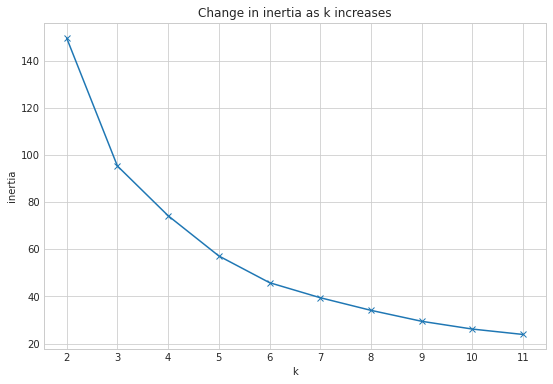

In [30]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [31]:
import wrangle_mall

df = wrangle_mall.get_mallcustomer_data()
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


DataFrame head: 
             gender  age  annual_income  spending_score
customer_id                                            
1              Male   19             15              39
2              Male   21             15              81
3            Female   20             16               6
DataFrame info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None
DataFrame description: 
              age  annual_income  spending_score
count  200.000000     200.000000      200.000000
mean    38.850000      60.560000       50.200000
std     13.969007      26.264721       25.823522
min     18.000000      15.000000        1.0

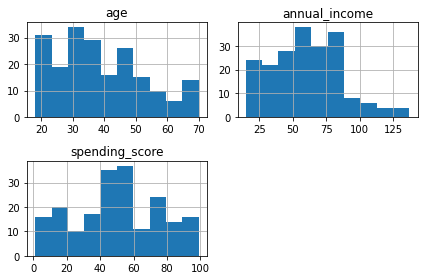

In [32]:
wrangle_mall.summarize(df)

In [33]:
df = wrangle_mall.mall_encoder(df, ['gender'])

In [34]:
df.head()

,age,annual_income,spending_score,gender_Male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


In [35]:
X = df[['annual_income', 'spending_score']]

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,annual_income,spending_score
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980


In [36]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [37]:
# make a new column names cluster in df and X_scaled dataframe
df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [38]:
df.head()

,age,annual_income,spending_score,gender_Male,cluster
customer_id,,,,,
1,19,15,39,1,0
2,21,15,81,1,0
3,20,16,6,0,0
4,23,16,77,0,0
5,31,17,40,0,0


In [39]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,annual_income,spending_score
0,-0.626190,-0.014392
1,1.009200,-1.225535
2,0.991583,1.239503


In [40]:
X_scaled['cluster'] = 'cluster_' + df.cluster.astype(str)
X_scaled.head()

,annual_income,spending_score,cluster
1,-1.738999,-0.434801,cluster_0
2,-1.738999,1.195704,cluster_0
3,-1.700830,-1.715913,cluster_0
4,-1.700830,1.040418,cluster_0
5,-1.662660,-0.395980,cluster_0


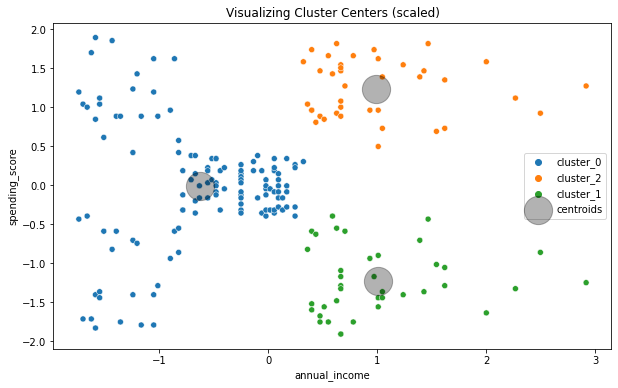

In [41]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='annual_income', y='spending_score', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='annual_income', y='spending_score', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')

plt.title('Visualizing Cluster Centers (scaled)')
plt.legend();

In [42]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,age,annual_income,spending_score,gender_Male,cluster
customer_id,,,,,
1,19,15,39,1,cluster_0
2,21,15,81,1,cluster_0
3,20,16,6,0,cluster_0
4,23,16,77,0,cluster_0
5,31,17,40,0,cluster_0


In [43]:
# Centriods for unscaled data?
centroids = df.groupby('cluster')['annual_income', 'spending_score'].mean()
centroids

,annual_income,spending_score
cluster,,
cluster_0,44.154472,49.829268
cluster_1,87.000000,18.631579
cluster_2,86.538462,82.128205


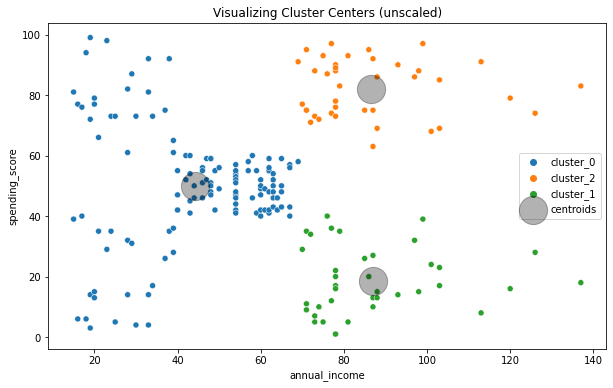

In [44]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='annual_income', y='spending_score', data=df, hue='cluster')
# plot cluster centers (centroids)
centroids.plot.scatter(x='annual_income', y='spending_score', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')
plt.title('Visualizing Cluster Centers (unscaled)')
plt.legend();

In [45]:
X = df[['annual_income', 'spending_score']]

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,annual_income,spending_score
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980


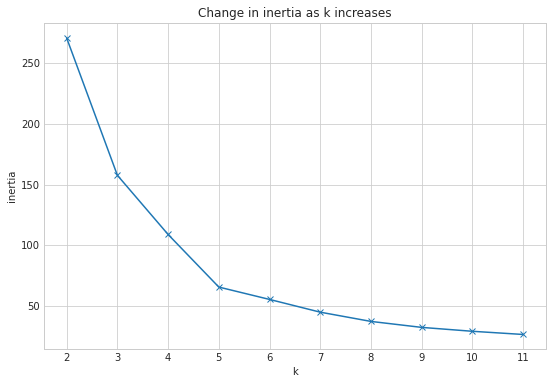

In [46]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

The graphs for the above exercises do not show much (if any) difference between scaled and unscaled data. This could be attributed to features having the same scale of units.

## Bonus

a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing

b) Visualize the data and guess the number and shape of the clusters.

c) Implement the KMeans algorithm on unscaled data and visualize the clusters.

d) Repeat the step above but with scaled data.

c) Write down the takeaways from this exercise.

In [47]:
# sheet_url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing'

# csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv('cluster_data.csv')
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


b) Visualize the data and guess the number and shape of the clusters.

looks like it should be 2 clusters, mostly oval in shape

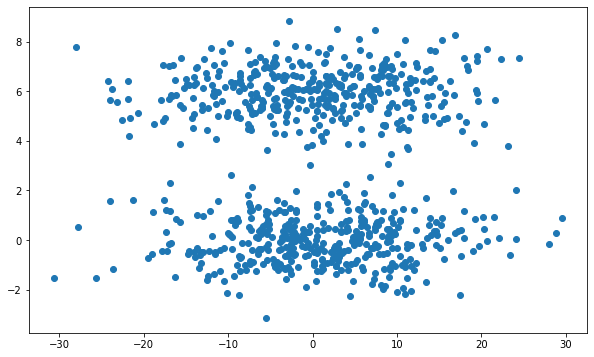

In [48]:
plt.figure(figsize = (10,6))
plt.scatter(df.x, df.y)
plt.show()

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

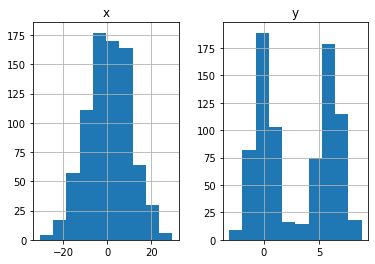

In [49]:
df.hist()

c) Implement the KMeans algorithm on unscaled data and visualize the clusters.

In [50]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=2, random_state = 123)

# fit the thing
kmeans.fit(df)

# Use (predict using) the thing 
kmeans.predict(df)

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [51]:
df['cluster'] = kmeans.predict(df)

In [52]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,x,y,cluster
0,-3.641747,0.121540,cluster_1
1,-7.620447,1.810897,cluster_1
2,-6.505373,0.068072,cluster_1
3,7.730963,0.585521,cluster_0
4,17.283668,0.344804,cluster_0


In [53]:
centroids = df.groupby('cluster')['x', 'y'].mean()
centroids

,x,y
cluster,,
cluster_0,8.140093,2.899115
cluster_1,-7.842407,3.054280


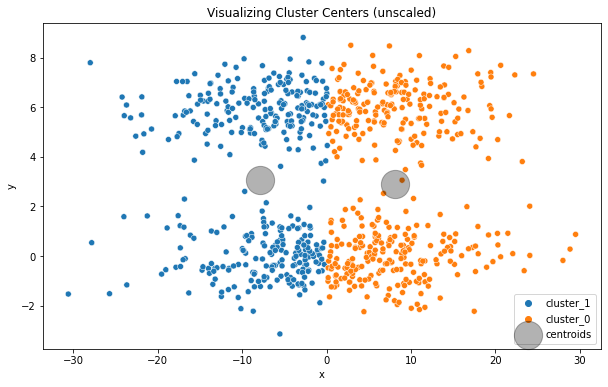

In [54]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='x', y='y', data=df, hue='cluster')
# plot cluster centers (centroids)
centroids.plot.scatter(x='x', y='y', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')
plt.title('Visualizing Cluster Centers (unscaled)')
plt.legend();

d) Repeat the step above but with scaled data.

In [55]:
df2 = df[['x', 'y']]
scaler = StandardScaler().fit(df2)
df_scaled = pd.DataFrame(scaler.transform(df2), columns= df2.columns).set_index([df2.index.values])
df_scaled.head()

,x,y
0,-0.419211,-0.904027
1,-0.821099,-0.368472
2,-0.708466,-0.920978
3,0.729546,-0.756937
4,1.694464,-0.833249


In [56]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=2, random_state = 123)

# fit the thing
kmeans.fit(df_scaled)

# Use (predict using) the thing 
kmeans.predict(df_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [57]:
df_scaled['cluster'] = kmeans.predict(df_scaled)

In [58]:
df_scaled['cluster'] = 'cluster_' + df_scaled.cluster.astype(str)
df_scaled.head()

,x,y,cluster
0,-0.419211,-0.904027,cluster_1
1,-0.821099,-0.368472,cluster_1
2,-0.708466,-0.920978,cluster_1
3,0.729546,-0.756937,cluster_1
4,1.694464,-0.833249,cluster_1


In [59]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = df2.columns)
centroids_scaled

,x,y
0,-0.040741,0.951092
1,0.040741,-0.951092


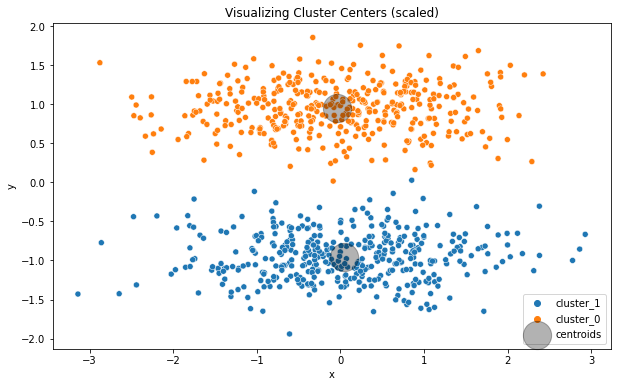

In [60]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='x', y='y', data=df_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='x', y='y', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')

plt.title('Visualizing Cluster Centers (scaled)')
plt.legend();